# Multunomiale Naive Bayes

## I) Theory

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being useful as a quick-and-dirty baseline for a classification problem.

### 1) Equations

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label $L$ given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

### 2) Multinomial Naive Bayes

The features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus made available through Scikit-Learn to show how we might classify these short documents into categories.

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (introduced in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

## When to Use Naive Bayes

Because naive Bayes classifiers make such stringent assumptions about data, they will generally not perform as well as more complicated models.
That said, they have several advantages:

- They are fast for both training and prediction.
- They provide straightforward probabilistic prediction.
- They are often easily interpretable.
- They have few (if any) tunable parameters.

These advantages mean a naive Bayes classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimensionality of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like the ones discussed here tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### 3) Conclusion

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, let's take a look at the confusion matrix between the true and predicted labels for the test data (see the following figure):

## II) Python implementation

### 1) Multinomial Naive Bayes

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\clean_.csv')
df = df[["Code_produit", "Secteur", "Ingrédient"]]
df.head()

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait_ecreme_reconstitue
1,450,Produits laitiers et desserts frais,sucre
2,450,Produits laitiers et desserts frais,fruit
3,450,Produits laitiers et desserts frais,creme
4,450,Produits laitiers et desserts frais,epaississants


In [2]:
df_new = df.groupby(['Code_produit', 'Secteur'])['Ingrédient'].agg(lambda col: ' '.join(col)).reset_index(name='Ingrédient')

from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(token_pattern='\\b(\\w+[\\.,%_1234567890:()]?\\w+)\\b')
count_matrix = coun_vect.fit_transform(df_new['Ingrédient'])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df_new[["Code_produit", "Secteur"]], df_vect], axis=1)
new_df = new_df.drop(['_ananas', '_b1,_b9', '_b1,_b9_et_provitamine_a', '_b12', '_caillettes_de_boeuf_en_proportions_naturelles', '_carotte,_potiron_et_spiruline', '_d_avoine,_de_riz_et_d_epeautre', '_d_orge_et_de_riz', '_de_cassis_et_de_mure', '_de_cuivre', '_de_cuivre_et_de_manganese', '_de_matiere_grasse', '_de_matieres_grasses_au_lait_demi_ecreme_pasteurise', '_de_mg', '_de_thym,_de_laurier', '_e', '_gr', '_lb.rhamnosus', '_maigre_de_tete,_viande_et_couenne_de_porc', '_mg', '_paprika', '_provitamine_a', '_rooibos_et_du_melange_de_13_plantes_ricola', '_tournesol', '_vanille'], axis=1)

In [3]:
new_df.head()

,Code_produit,Secteur,3_poivres,abondance_aop,abricot,abricot_de_provence,abricot_deshydrate,abricot_lyophilise,abricot_nectarine,abricot_orange,...,zestes_d_orange,zestes_d_oranges,zestes_de_citron,zestes_de_citron_deshydrates,zestes_de_citron_jaune,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys_patagonica
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = new_df[["Secteur"]]
df_features = new_df.drop(["Code_produit", "Secteur"], axis=1)

In [8]:
y

,Secteur
0,Produits laitiers et desserts frais
1,Produits laitiers et desserts frais
2,Produits laitiers et desserts frais
3,Produits laitiers et desserts frais
4,Produits laitiers et desserts frais
...,...
65231,Sirops et boissons concentrees a diluer
65232,Sirops et boissons concentrees a diluer
65233,Sirops et boissons concentrees a diluer
65234,Sirops et boissons concentrees a diluer


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=30)
X_lda = lda.fit_transform(df_features, y)

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
X = pd.DataFrame(X_lda)
X
X.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\clean_lda.csv')

In [22]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_ = pd.DataFrame(X_)
X_

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.826776,0.375907,0.540275,0.680575,0.673852,0.614784,0.536734,0.537060,0.601697,0.557360,...,0.477933,0.611405,0.324975,0.298807,0.307487,0.409955,0.357855,0.814064,0.789872,0.806784
1,0.848350,0.383474,0.556013,0.665059,0.757387,0.604570,0.450661,0.559762,0.575034,0.587137,...,0.478419,0.608203,0.314226,0.288401,0.320128,0.414979,0.361924,0.808490,0.786682,0.813843
2,0.846487,0.374543,0.534325,0.706427,0.766920,0.634199,0.481443,0.611103,0.647848,0.475575,...,0.488682,0.614764,0.293649,0.271874,0.319739,0.452931,0.374703,0.818642,0.789345,0.818805
3,0.846760,0.383158,0.569927,0.651972,0.749956,0.582726,0.444564,0.536722,0.542191,0.648829,...,0.473714,0.614039,0.322550,0.291800,0.330022,0.418990,0.361539,0.809292,0.786037,0.796477
4,0.846579,0.403201,0.558620,0.657233,0.744293,0.609315,0.428394,0.545531,0.568100,0.582572,...,0.483666,0.609687,0.308987,0.285086,0.319751,0.423994,0.362920,0.807958,0.786319,0.810368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65231,0.847246,0.405359,0.534633,0.556427,0.673972,0.565089,0.355684,0.428413,0.562885,0.496835,...,0.501672,0.598822,0.279688,0.279340,0.311893,0.449590,0.353149,0.807004,0.786520,0.801416
65232,0.845879,0.383110,0.492496,0.514950,0.668515,0.566440,0.378346,0.413015,0.561224,0.501517,...,0.479155,0.697778,0.311653,0.258194,0.328503,0.412150,0.508824,0.832622,0.813545,0.798122
65233,0.846169,0.391137,0.472136,0.550051,0.676781,0.573077,0.403685,0.414124,0.564231,0.494826,...,0.506036,0.697943,0.282325,0.233808,0.304402,0.431453,0.593527,0.849838,0.826749,0.790733
65234,0.845887,0.380957,0.508517,0.552654,0.697729,0.533389,0.395061,0.380249,0.567195,0.455830,...,0.499825,0.764371,0.271982,0.178732,0.303127,0.407247,0.567496,0.870472,0.832815,0.806230


In [9]:
exp_var = sum(lda.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 99.99999999999999


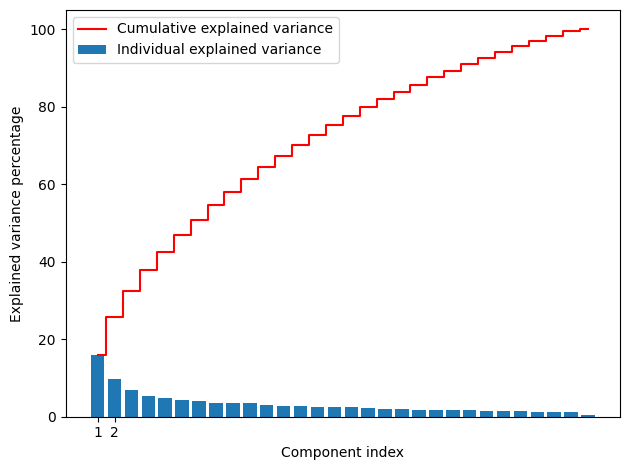

In [11]:
import numpy as np
from matplotlib import pyplot as plt



exp_var = lda.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 31), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 31), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Component index')
plt.xticks(ticks=[1, 2])
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot_LDA.png")

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not                                        Secteur
0          Produits laitiers et desserts frais
1          Produits laitiers et desserts frais
2          Produits laitiers et desserts frais
3          Produits laitiers et desserts frais
4          Produits laitiers et desserts frais
...                                        ...
65231  Sirops et boissons concentrees a diluer
65232  Sirops et boissons concentrees a diluer
65233  Sirops et boissons concentrees a diluer
65234  Sirops et boissons concentrees a diluer
65235  Sirops et boissons concentrees a diluer

[65236 rows x 1 columns]

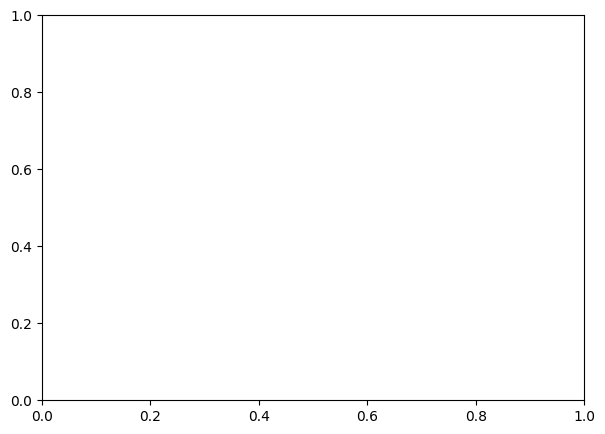

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, s=25, cmap='plasma')
plt.title('LDA for wine data with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig("LDA.png")

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
#df_features
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, shuffle=True, random_state=42)

https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning

A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against.


A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against.

In more detail:

A machine learning algorithm tries to learn a function that models the relationship between the input (feature) data and the target variable (or label). When you test it, you will typically measure performance in one way or another. For example, your algorithm may be 75% accurate. But what does this mean? You can infer this meaning by comparing with a baseline's performance.


Multinomial Naive Bayes

The sklearn's naive bayes class has a module for multinomial models. It is designed for classification with discrete features (e.g. word counts for text classification) - perfect for this problem. With text classification, it requires integer feature counts or tf-idf input.

Alpha is the only parameter that I have tuned. I tried [0.01, 0.02, 0.035, 0.04, 0.1, 0.5, 1] and found that 0.035 gives the highest validation score - 0.7424.

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [7]:


# Best estimator after running the grid search cross validation for the Multinomial Naive Bayes model
clf_mnb = MultinomialNB(alpha=0.035, class_prior=None, fit_prior=True)
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


pipe_nb = make_pipeline(
    MultinomialNB(alpha=0.1)
)
scores = cross_validate(pipe_nb, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

,fit_time,score_time,test_score,train_score
0,0.231786,0.024022,0.268825,0.268719
1,0.137863,0.021001,0.268346,0.268790
2,0.211831,0.023003,0.268442,0.268575
3,0.220685,0.038761,0.267701,0.268688
4,0.154201,0.024000,0.269522,0.268281


In [26]:
pd.DataFrame(scores).mean()

fit_time       0.172407
score_time     0.021035
test_score     0.268529
train_score    0.268577
dtype: float64

In [12]:
param_grid_nb = {
    'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

pipe_nb = make_pipeline(
    MultinomialNB()
)

random_search = RandomizedSearchCV(pipe_nb, param_grid, cv=3, verbose=2,  n_iter=5)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


ValueError: Invalid parameter 'alpha' for estimator Pipeline(steps=[('multinomialnb', MultinomialNB())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [37]:
param_grid_nb = {
    'var_smoothing': [0.1]
}
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=2, cv=2, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
GaussianNB(var_smoothing=0.1)


c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
nbModel_grid.score(X_test, y_test)

0.9304107909258124

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = nbModel_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, average="weighted"), ": is the accuracy score")
from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average="weighted"), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average="weighted"), ": is the f1 score")

[[ 152    0    0    1    0    0    0    0    0   24    0    0    0    0
     0    3    0    0    0    4    0    1    1    1    0    2    1    0
     0    0    0]
 [   0  297    0    8    0    0    0    0    2    1    0    0    0    1
     0    0    0    0   16    0    0    0   10    0    0    2    0    0
     0    0    0]
 [   0    0   67    0    0    0    5    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    1 1298    1    0    0    0    4    0    0    0    0    2
     0    0    0    0    7    0    0    0   17    2    1    0    0    0
     0    0    0]
 [   0    0    0    0  368    0    0    0    0    1    1    0    0    0
     0   39    0    0    0    0    0    0    5    5    0    0    0    0
     1    0    0]
 [   0    0    0    0    1  263    0    0    0    0    0    0    0    0
     0    1    0    0    0    2    0    3    0    0    2    5    2    0
     0    0    0]
 [   0    1    5    4    0  

TypeError: got an unexpected keyword argument 'average'

In [30]:

from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average="weighted"), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average="weighted"), ": is the f1 score")

0.9304107909258124 : is the recall score
0.9329957886293471 : is the f1 score


In [ ]:
y_pred_mnb

array(['Produits traiteurs frais', 'Plats cuisines ambiants',
       'Plats cuisines ambiants', ..., 'Plats cuisines frais',
       'Plats cuisines surgeles', 'Snacking surgele'], dtype='<U45')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import MultinomialNB

In [7]:
clf_mnb = MultinomialNB()
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)

In [6]:
from sklearn.naive_bayes import CategoricalNB
clf_mnb = CategoricalNB()
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [12]:
y_train.values

array(['Glaces et sorbets', 'Sauces condimentaires',
       'Produits laitiers et desserts frais', ..., 'Glaces et sorbets',
       'Produits laitiers et desserts frais',
       'Produits transformes a base de pomme de terre'], dtype=object)

In [11]:


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_mnb, labels=y_train.values)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train.values, yticklabels=y_train.values)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score


In [10]:
accuray = accuracy_score(y_pred_mnb, y_test)
f1 = f1_score(y_pred_mnb, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8923206621704476
F1 Score: 0.8922367361212168


In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:


predict_category('sending a payload to the ISS')



In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score, precision_score, recall_score, classification_report

#Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print("F1 Score:",f1_score(y_test, y_pred, average="macro")*100)
print("Precision:",precision_score(y_test, y_pred, average="macro")*100)
print("Recall:",recall_score(y_test, y_pred, average="macro")*100)
print (classification_report(y_test,y_pred))

Accuracy: 85.33108522378909
F1 Score: 81.30978080986513
Precision: 89.2926639219838
Recall: 78.49630124315333
                                               precision    recall  f1-score   support

       Aliments infantiles de diversification       0.98      0.65      0.78       190
                          Aperitifs a croquer       0.94      0.79      0.85       337
                           Barres cerealieres       1.00      0.47      0.64        72
              Biscuits et gateaux industriels       0.82      0.98      0.89      1333
        Boissons Rafraichissantes Sans Alcool       0.79      0.91      0.85       420
                         Bouillons et potages       0.89      0.83      0.86       279
              Cereales pour le petit dejeuner       0.83      0.93      0.88       285
                                  Charcuterie       0.96      0.96      0.96       538
              Chocolat et produits chocolates       0.98      0.83      0.90       304
                   

In [6]:

# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

    


In [7]:
from sklearn.naive_bayes import CategoricalNB

In [8]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X_train, y_train, CategoricalNB())

IndexError: index 5 is out of bounds for axis 1 with size 5